In [2]:
from dataAcquisition import DataAcquisition
from EDA import EDA
from dataPreprocessing import DataPreprocessing
from modelTraining import ModelTraining
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2


In [3]:
data_acquirer = DataAcquisition()

# train_X, test_X, train_y, test_y = data_acquirer.acquire_data()
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

# Exploratory Data Analysis

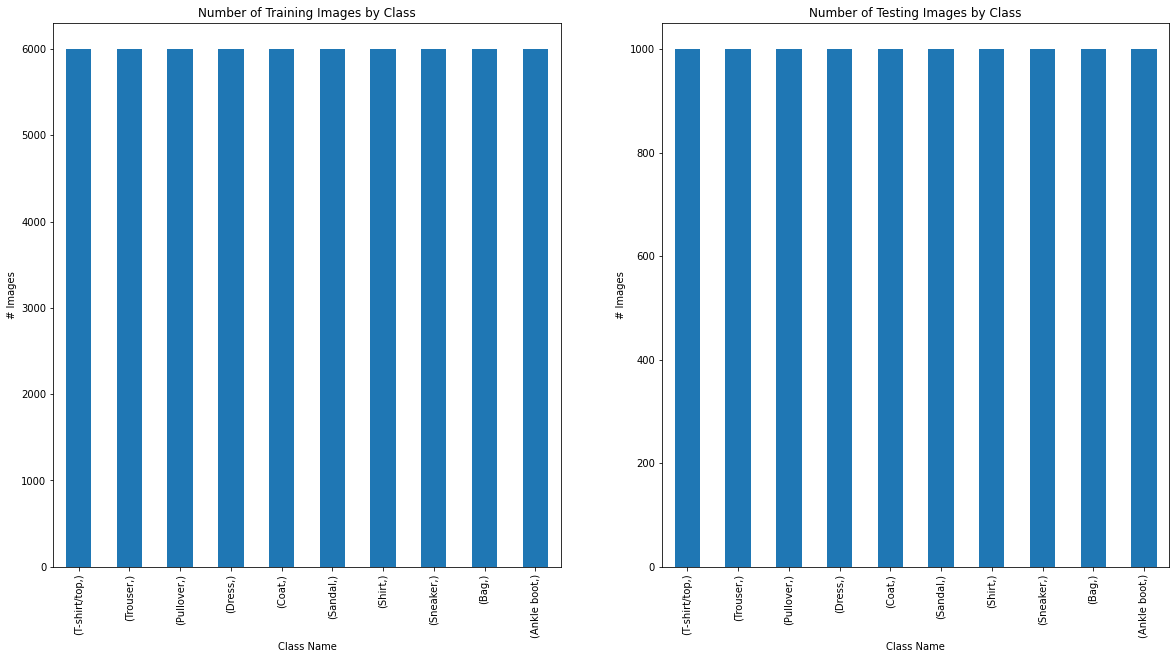

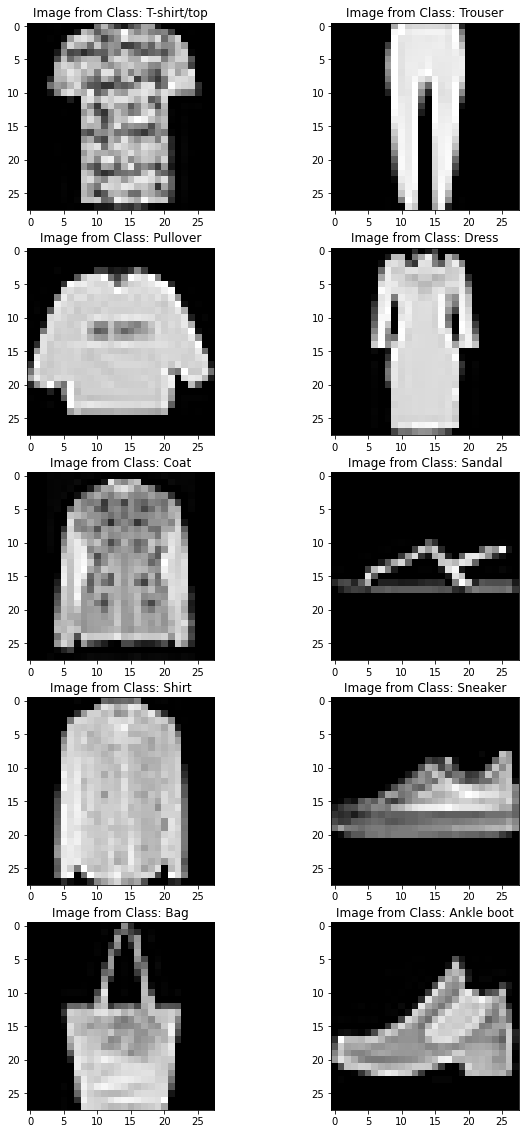

<bound method NDFrame.head of              pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.411467      0.805767      2.198283      5.682000     14.488767   
std        5.836188  

In [4]:
eda = EDA()

eda.plot(y_train, y_test, plot_type="classes_bar_plot")
eda.plot(X_train, y_train, plot_type="display_images")
stats = eda.descriptive_statistics(X_train)
print(stats.head)
constant_training_pixels = eda.find_constant_pixels(X_train)
constant_testing_pixels = eda.find_constant_pixels(X_test)
print(f"Constant Pixels in Training Set: {constant_training_pixels}")
print(f"Constant Pixels in Testing Set: {constant_testing_pixels}")

# Data Preprocessing

b: 784, a: 24


<Figure size 720x1440 with 0 Axes>

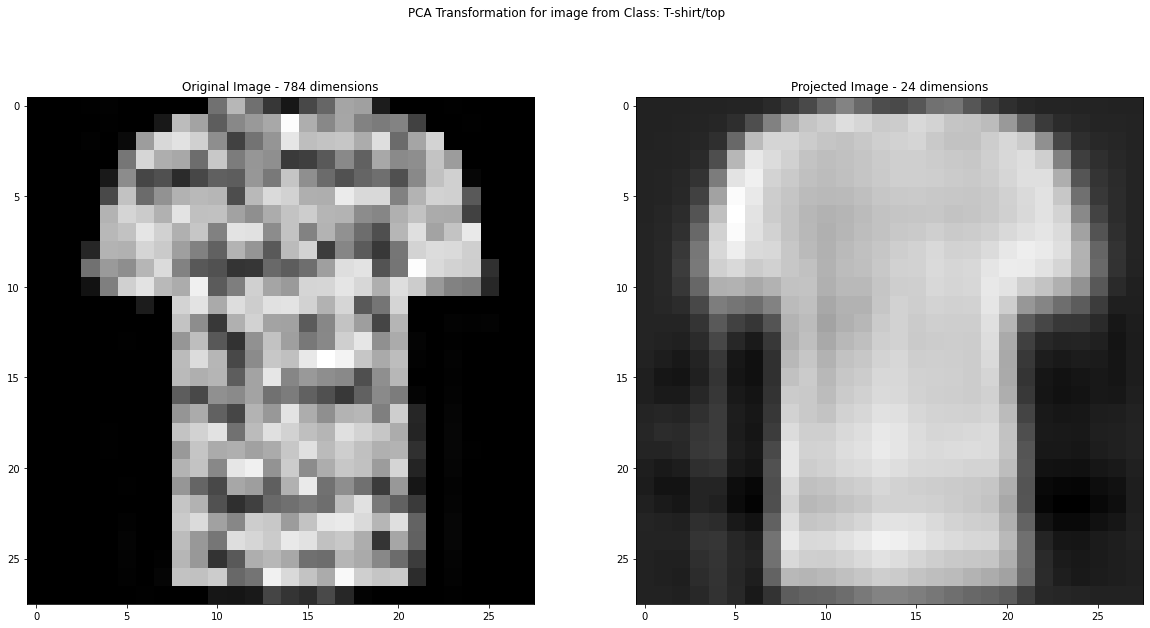

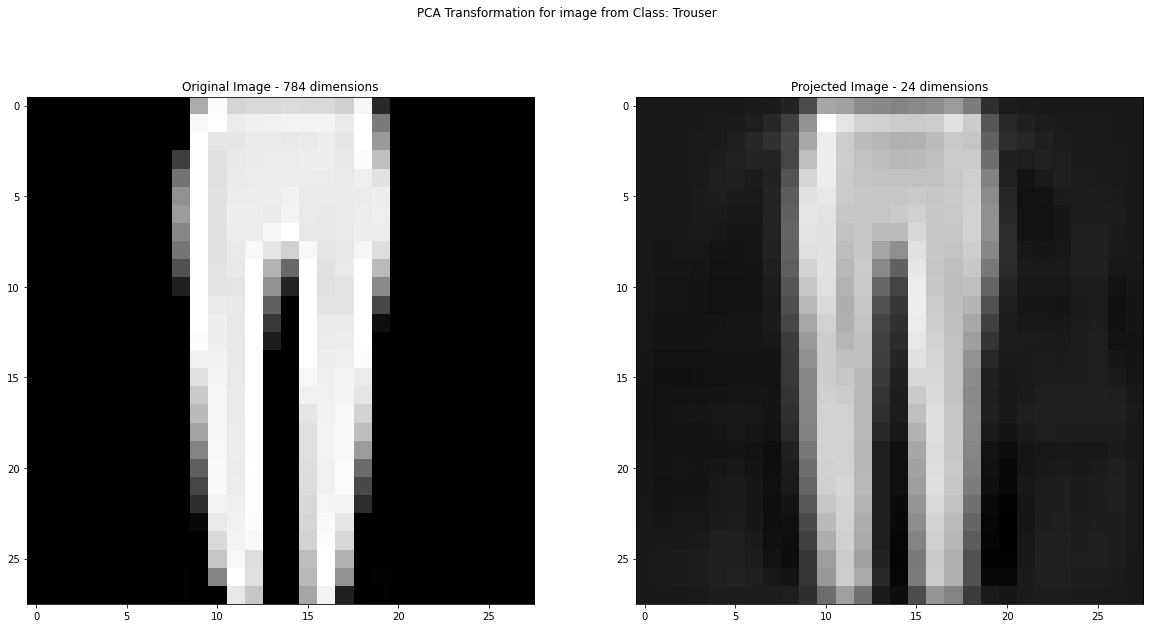

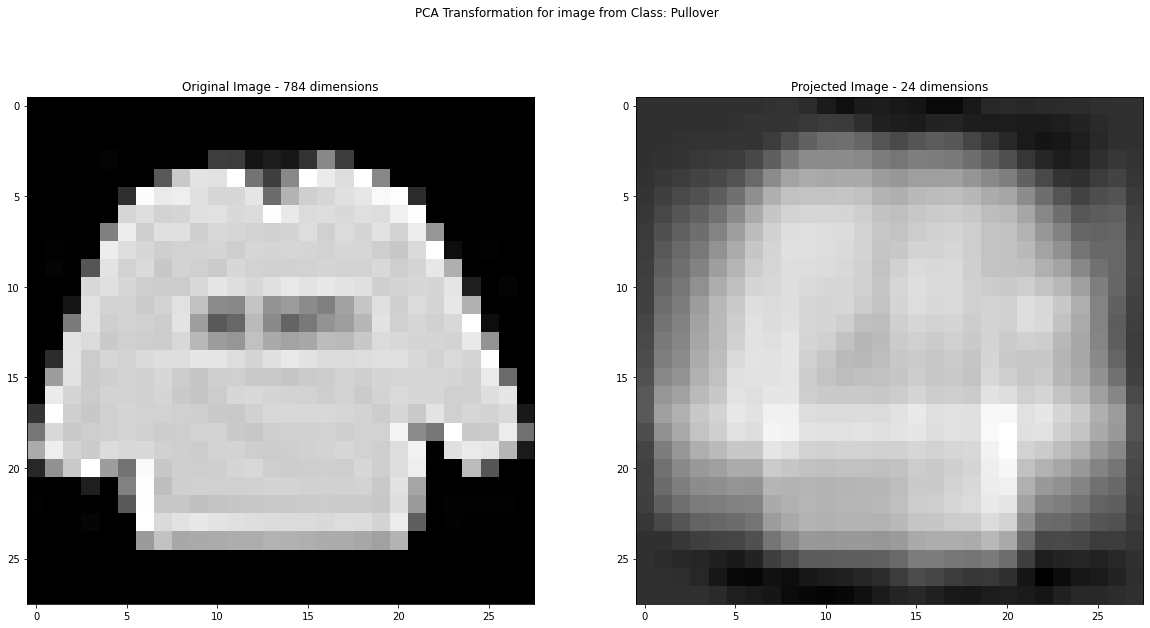

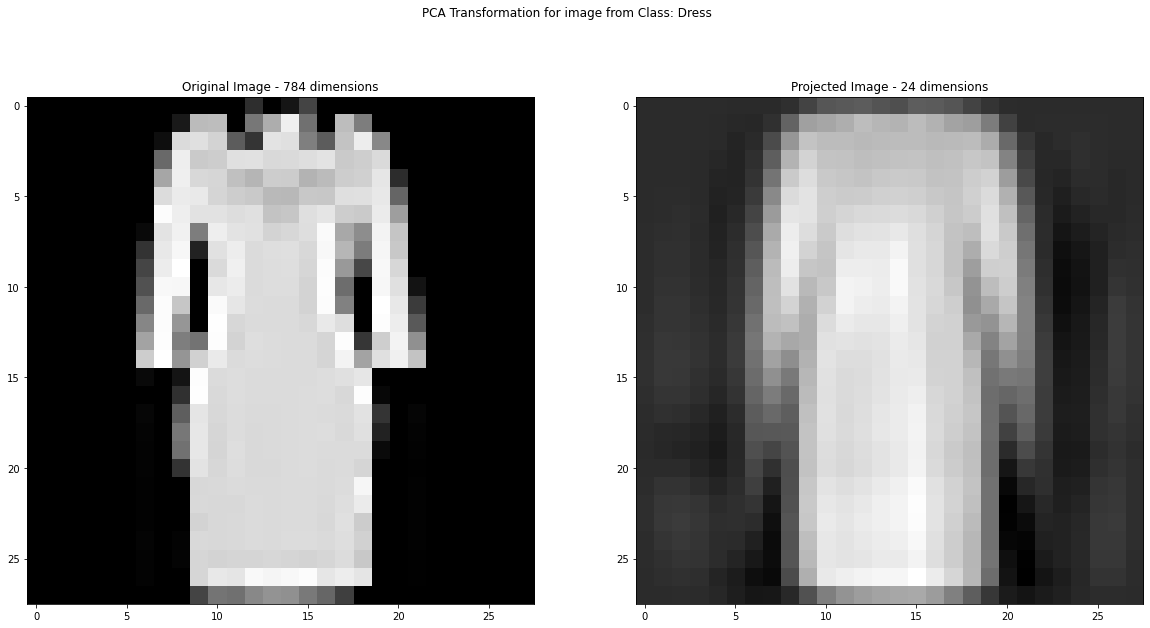

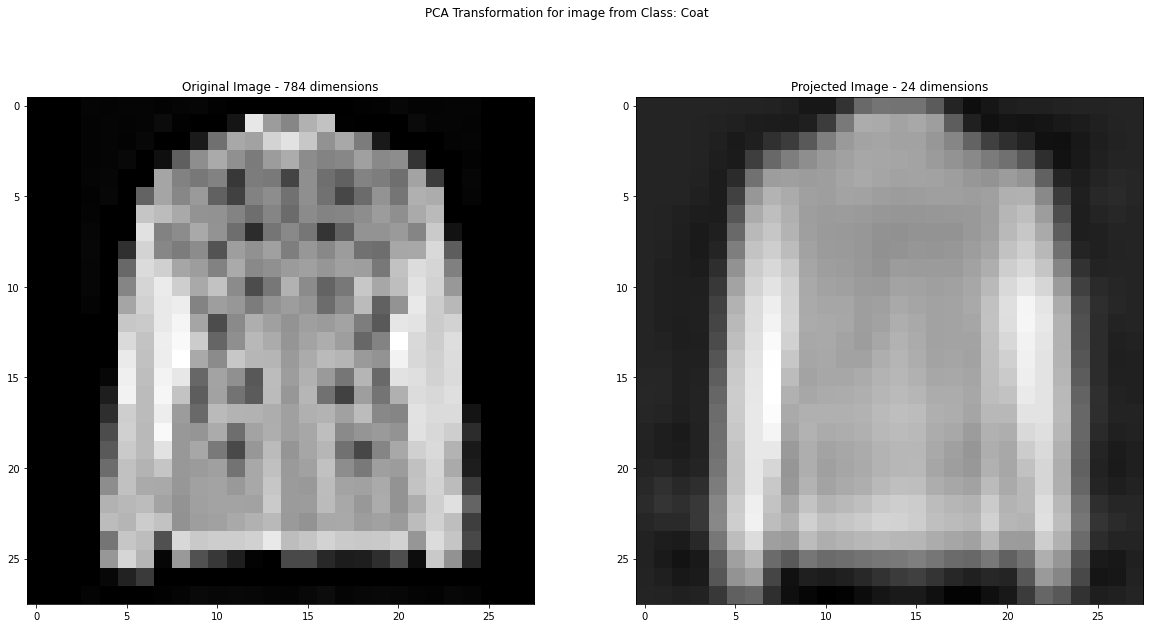

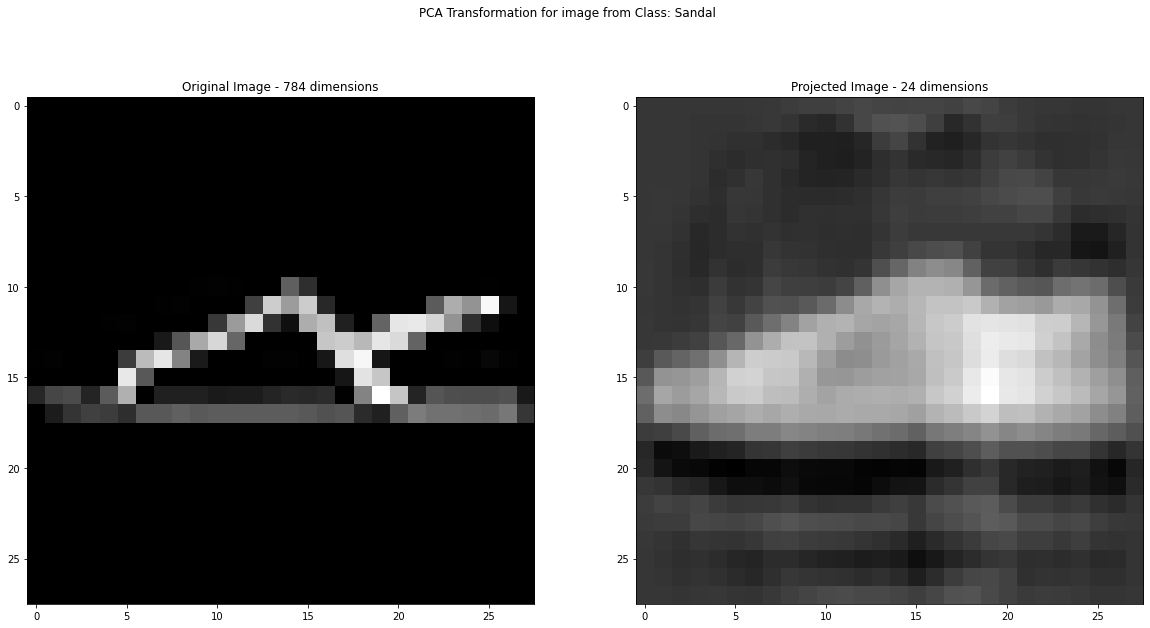

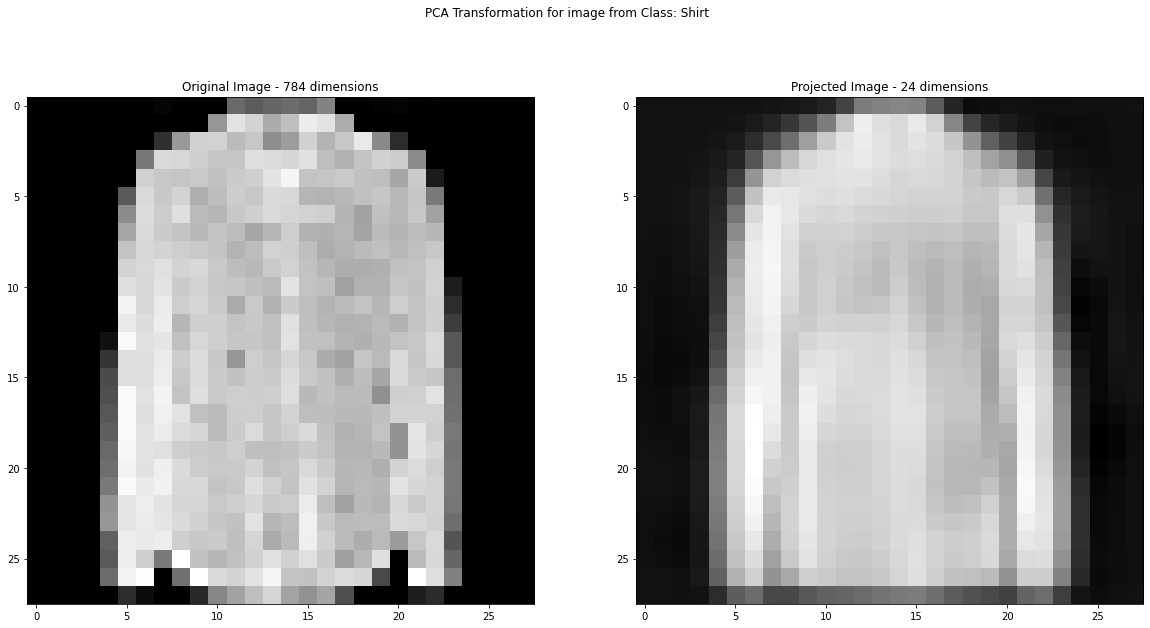

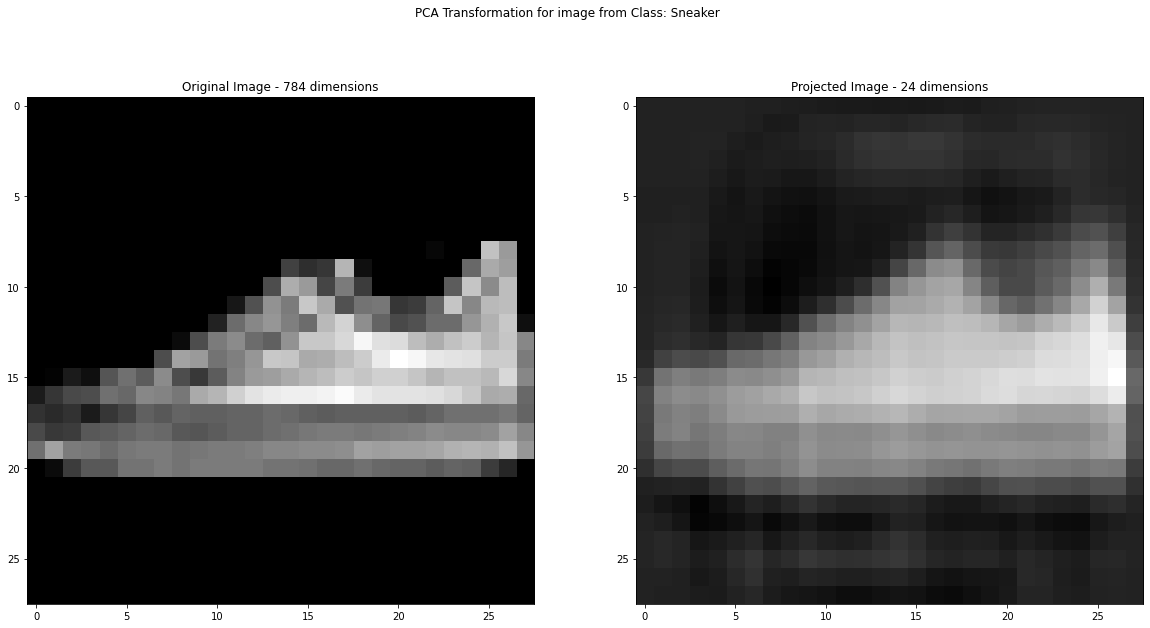

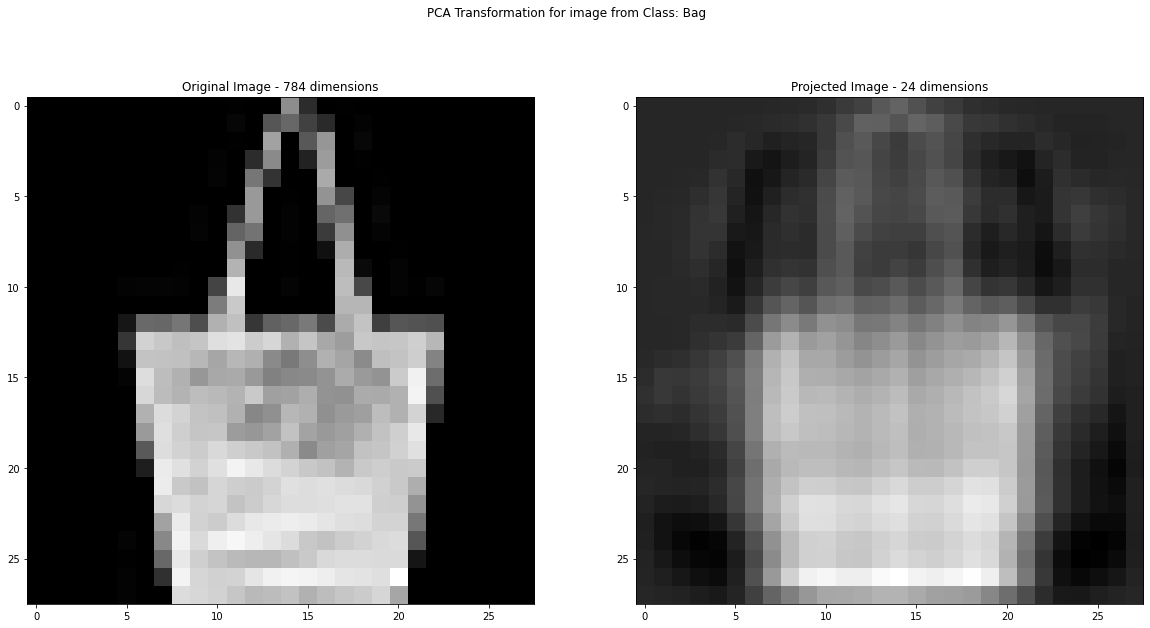

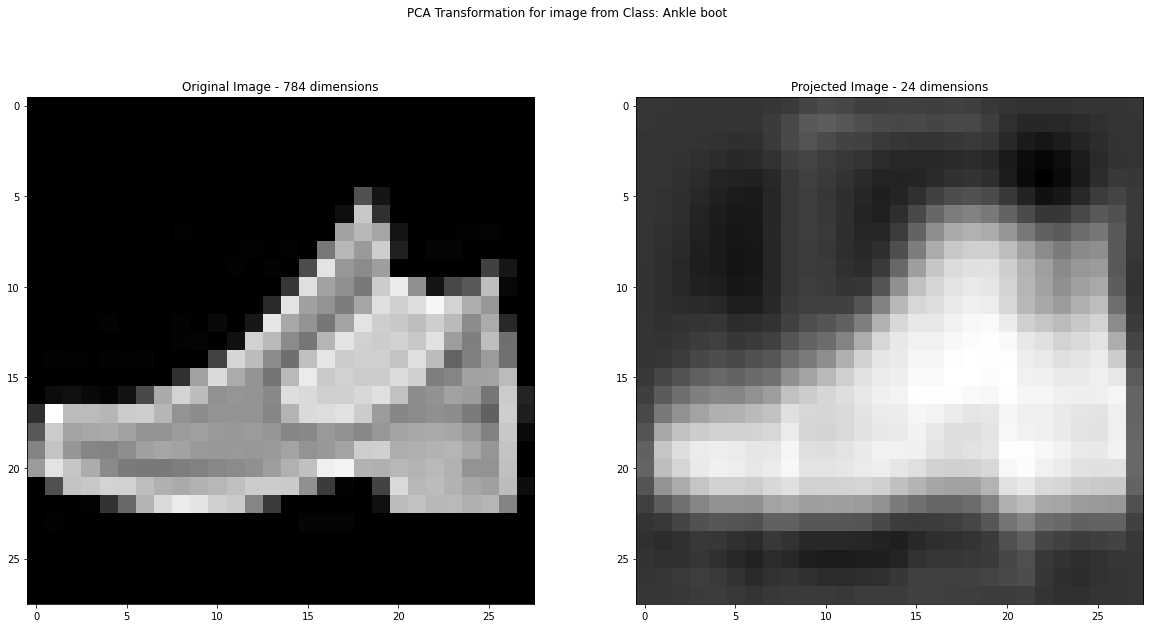

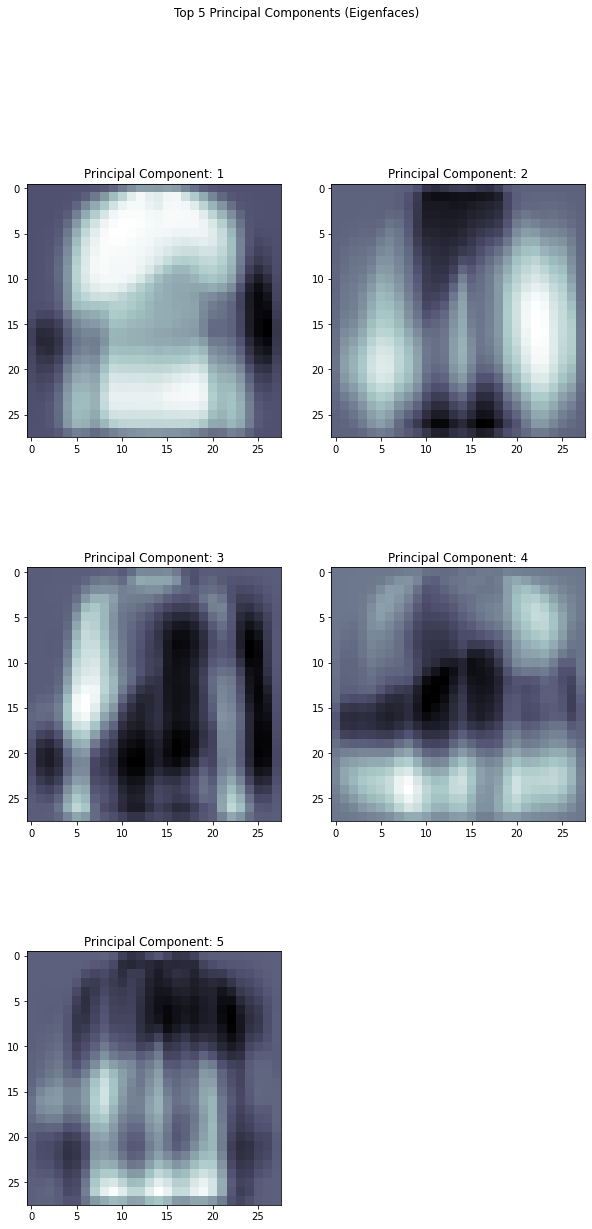

In [5]:
preprocessor = DataPreprocessing()

X_train_pca, X_test_pca = preprocessor.dimensionality_reduction(X_train, X_test, 0.8)
print(f"b: {preprocessor.num_components_before}, a: {preprocessor.num_components_after}")
preprocessor.plot(X_train, X_train_pca, y_train, plot_type='pca_images')
preprocessor.plot(plot_type="eigenfaces")

# Model Training

In [30]:
model_trainer = ModelTraining(X_train, y_train, X_test, y_test)

nn = model_trainer.neural_network()









(60000, 784)
(60000, 28, 28, 1)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                     

Not removing highly correlated features as we would normally because
since the feature-set is composed of pixel-based features, neighbouring
pixels will likely have a high correlation - meaning we would need to
remove a lot which would end up destroying a large chunk of the image.



